In [1]:
suppressPackageStartupMessages({
    library(tidyverse)
    library(data.table)
    library(Matrix)
    library(Seurat)
    library(R.utils)
})

Warning message:
"package 'ggplot2' was built under R version 4.4.2"
Warning message:
"package 'tibble' was built under R version 4.4.2"
Warning message:
"package 'tidyr' was built under R version 4.4.2"
Warning message:
"package 'dplyr' was built under R version 4.4.2"
Warning message:
"package 'data.table' was built under R version 4.4.2"


### Read in the data

In [2]:
postTrans <- readRDS(file = "Data/seu.integrated.resolution_search.rds")
postTrans

An object of class Seurat 
36601 features across 24606 samples within 1 assay 
Active assay: RNA (36601 features, 2000 variable features)
 3 layers present: data, counts, scale.data
 3 dimensional reductions calculated: pca, umap, integrated.harmony

In [3]:
head(postTrans)

orig.ident nCount_RNA nFeature_RNA percent.mt sample
A_AAACGCTTCACTTGTT_A_pos BMT_A      29477      6684         2.337416   A     
A_AAAGGATCAATGCAGG_A_pos BMT_A      43334      7226         5.169151   A     
A_AAAGGATGTGCGAGTA_A_pos BMT_A      46221      7362         4.013327   A     
A_AAAGGATTCACTGATG_A_pos BMT_A      25484      4623         7.243761   A     
A_AAAGGGCCACCCTCTA_A_pos BMT_A      28699      6420         2.871180   A     
A_AAAGGTAGTCGCATCG_A_pos BMT_A      20363      4041         4.262633   A     
A_AAAGGTATCATTGTGG_A_pos BMT_A      31372      6826         6.802244   A     
A_AAAGGTATCCGAGGCT_A_pos BMT_A      31802      5299         6.716559   A     
A_AAAGGTATCGGTCACG_A_pos BMT_A      48519      7748         6.618026   A     
A_AAAGGTATCTCGCAGG_A_pos BMT_A      14838      3548         4.960237   A     
                         barcode                CD34_subsample CD34 nCount_HTO
A_AAACGCTTCACTTGTT_A_pos AAACGCTTCACTTGTT_A_pos pos            pos  12.98252  
A_AAAGGATCAATGCAGG_A_pos AAAGGATCAATGCAGG_A_pos pos            pos  15.07064  
A_AAAGGATGTGCGAGTA_A_pos AAAGGATGTGCGAGTA_A_pos pos            pos  15.09084  
A_AAAGGATTCACTGATG_A_pos AAAGGATTCACTGATG_A_pos pos            pos  15.47098  
A_AAAGGGCCACCCTCTA_A_pos AAAGGGCCACCCTCTA_A_pos pos            pos  13.40386  
A_AAAGGTAGTCGCATCG_A_pos AAAGGTAGTCGCATCG_A_pos pos            pos  13.97667  
A_AAAGGTATCATTGTGG_A_pos AAAGGTATCATTGTGG_A_pos pos            pos  14.06007  
A_AAAGGTATCCGAGGCT_A_pos AAAGGTATCCGAGGCT_A_pos pos            pos  13.56754  
A_AAAGGTATCGGTCACG_A_pos AAAGGTATCGGTCACG_A_pos pos            pos  13.91961  
A_AAAGGTATCTCGCAGG_A_pos AAAGGTATCTCGCAGG_A_pos pos            pos  14.14402  
                         nFeature_HTO ⋯ seurat_clusters_resolution_0.1
A_AAACGCTTCACTTGTT_A_pos 7            ⋯ 1                             
A_AAAGGATCAATGCAGG_A_pos 7            ⋯ 3                             
A_AAAGGATGTGCGAGTA_A_pos 7            ⋯ 1                             
A_AAAGGATTCACTGATG_A_pos 7            ⋯ 3                             
A_AAAGGGCCACCCTCTA_A_pos 7            ⋯ 4                             
A_AAAGGTAGTCGCATCG_A_pos 7            ⋯ 1                             
A_AAAGGTATCATTGTGG_A_pos 7            ⋯ 1                             
A_AAAGGTATCCGAGGCT_A_pos 7            ⋯ 0                             
A_AAAGGTATCGGTCACG_A_pos 7            ⋯ 0                             
A_AAAGGTATCTCGCAGG_A_pos 7            ⋯ 1                             
                         seurat_clusters_resolution_0.2
A_AAACGCTTCACTTGTT_A_pos 4                             
A_AAAGGATCAATGCAGG_A_pos 5                             
A_AAAGGATGTGCGAGTA_A_pos 4                             
A_AAAGGATTCACTGATG_A_pos 5                             
A_AAAGGGCCACCCTCTA_A_pos 6                             
A_AAAGGTAGTCGCATCG_A_pos 2                             
A_AAAGGTATCATTGTGG_A_pos 4                             
A_AAAGGTATCCGAGGCT_A_pos 1                             
A_AAAGGTATCGGTCACG_A_pos 1                             
A_AAAGGTATCTCGCAGG_A_pos 2                             
                         seurat_clusters_resolution_0.3
A_AAACGCTTCACTTGTT_A_pos 4                             
A_AAAGGATCAATGCAGG_A_pos 5                             
A_AAAGGATGTGCGAGTA_A_pos 4                             
A_AAAGGATTCACTGATG_A_pos 5                             
A_AAAGGGCCACCCTCTA_A_pos 7                             
A_AAAGGTAGTCGCATCG_A_pos 2                             
A_AAAGGTATCATTGTGG_A_pos 2                             
A_AAAGGTATCCGAGGCT_A_pos 1                             
A_AAAGGTATCGGTCACG_A_pos 1                             
A_AAAGGTATCTCGCAGG_A_pos 2                             
                         seurat_clusters_resolution_0.4
A_AAACGCTTCACTTGTT_A_pos 4                             
A_AAAGGATCAATGCAGG_A_pos 5                             
A_AAAGGATGTGCGAGTA_A_pos 4                             
A_AAAGGATTCACTGATG_A_pos 5                             
A_AAA

In [4]:
posttrans_plot <- UMAPPlot(postTrans) + scale_x_reverse()

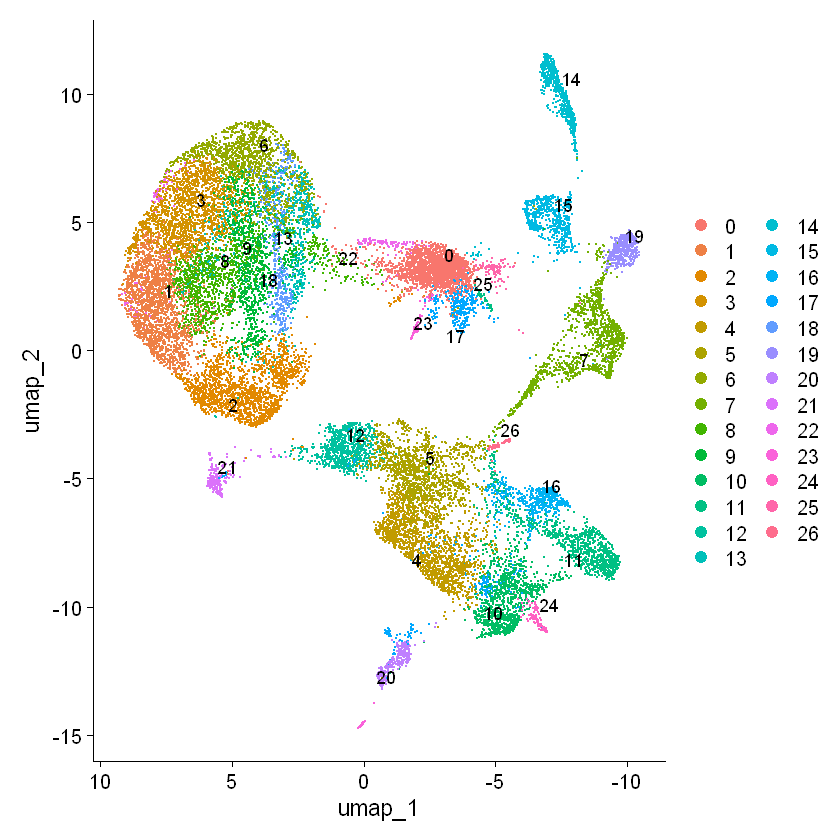

In [5]:
LabelClusters(plot = posttrans_plot, id = "ident")

### Filtering the data

In [6]:
postTrans_rev <- subset(postTrans, subset = (percent.mt <= 10))

In [7]:
head(postTrans_rev)

orig.ident nCount_RNA nFeature_RNA percent.mt sample
A_AAACGCTTCACTTGTT_A_pos BMT_A      29477      6684         2.337416   A     
A_AAAGGATCAATGCAGG_A_pos BMT_A      43334      7226         5.169151   A     
A_AAAGGATGTGCGAGTA_A_pos BMT_A      46221      7362         4.013327   A     
A_AAAGGATTCACTGATG_A_pos BMT_A      25484      4623         7.243761   A     
A_AAAGGGCCACCCTCTA_A_pos BMT_A      28699      6420         2.871180   A     
A_AAAGGTAGTCGCATCG_A_pos BMT_A      20363      4041         4.262633   A     
A_AAAGGTATCATTGTGG_A_pos BMT_A      31372      6826         6.802244   A     
A_AAAGGTATCCGAGGCT_A_pos BMT_A      31802      5299         6.716559   A     
A_AAAGGTATCGGTCACG_A_pos BMT_A      48519      7748         6.618026   A     
A_AAAGGTATCTCGCAGG_A_pos BMT_A      14838      3548         4.960237   A     
                         barcode                CD34_subsample CD34 nCount_HTO
A_AAACGCTTCACTTGTT_A_pos AAACGCTTCACTTGTT_A_pos pos            pos  12.98252  
A_AAAGGATCAATGCAGG_A_pos AAAGGATCAATGCAGG_A_pos pos            pos  15.07064  
A_AAAGGATGTGCGAGTA_A_pos AAAGGATGTGCGAGTA_A_pos pos            pos  15.09084  
A_AAAGGATTCACTGATG_A_pos AAAGGATTCACTGATG_A_pos pos            pos  15.47098  
A_AAAGGGCCACCCTCTA_A_pos AAAGGGCCACCCTCTA_A_pos pos            pos  13.40386  
A_AAAGGTAGTCGCATCG_A_pos AAAGGTAGTCGCATCG_A_pos pos            pos  13.97667  
A_AAAGGTATCATTGTGG_A_pos AAAGGTATCATTGTGG_A_pos pos            pos  14.06007  
A_AAAGGTATCCGAGGCT_A_pos AAAGGTATCCGAGGCT_A_pos pos            pos  13.56754  
A_AAAGGTATCGGTCACG_A_pos AAAGGTATCGGTCACG_A_pos pos            pos  13.91961  
A_AAAGGTATCTCGCAGG_A_pos AAAGGTATCTCGCAGG_A_pos pos            pos  14.14402  
                         nFeature_HTO ⋯ seurat_clusters_resolution_0.1
A_AAACGCTTCACTTGTT_A_pos 7            ⋯ 1                             
A_AAAGGATCAATGCAGG_A_pos 7            ⋯ 3                             
A_AAAGGATGTGCGAGTA_A_pos 7            ⋯ 1                             
A_AAAGGATTCACTGATG_A_pos 7            ⋯ 3                             
A_AAAGGGCCACCCTCTA_A_pos 7            ⋯ 4                             
A_AAAGGTAGTCGCATCG_A_pos 7            ⋯ 1                             
A_AAAGGTATCATTGTGG_A_pos 7            ⋯ 1                             
A_AAAGGTATCCGAGGCT_A_pos 7            ⋯ 0                             
A_AAAGGTATCGGTCACG_A_pos 7            ⋯ 0                             
A_AAAGGTATCTCGCAGG_A_pos 7            ⋯ 1                             
                         seurat_clusters_resolution_0.2
A_AAACGCTTCACTTGTT_A_pos 4                             
A_AAAGGATCAATGCAGG_A_pos 5                             
A_AAAGGATGTGCGAGTA_A_pos 4                             
A_AAAGGATTCACTGATG_A_pos 5                             
A_AAAGGGCCACCCTCTA_A_pos 6                             
A_AAAGGTAGTCGCATCG_A_pos 2                             
A_AAAGGTATCATTGTGG_A_pos 4                             
A_AAAGGTATCCGAGGCT_A_pos 1                             
A_AAAGGTATCGGTCACG_A_pos 1                             
A_AAAGGTATCTCGCAGG_A_pos 2                             
                         seurat_clusters_resolution_0.3
A_AAACGCTTCACTTGTT_A_pos 4                             
A_AAAGGATCAATGCAGG_A_pos 5                             
A_AAAGGATGTGCGAGTA_A_pos 4                             
A_AAAGGATTCACTGATG_A_pos 5                             
A_AAAGGGCCACCCTCTA_A_pos 7                             
A_AAAGGTAGTCGCATCG_A_pos 2                             
A_AAAGGTATCATTGTGG_A_pos 2                             
A_AAAGGTATCCGAGGCT_A_pos 1                             
A_AAAGGTATCGGTCACG_A_pos 1                             
A_AAAGGTATCTCGCAGG_A_pos 2                             
                         seurat_clusters_resolution_0.4
A_AAACGCTTCACTTGTT_A_pos 4                             
A_AAAGGATCAATGCAGG_A_pos 5                             
A_AAAGGATGTGCGAGTA_A_pos 4                             
A_AAAGGATTCACTGATG_A_pos 5                             
A_AAA

In [8]:
postTrans_rev_plot <- UMAPPlot(postTrans_rev) + scale_x_reverse()

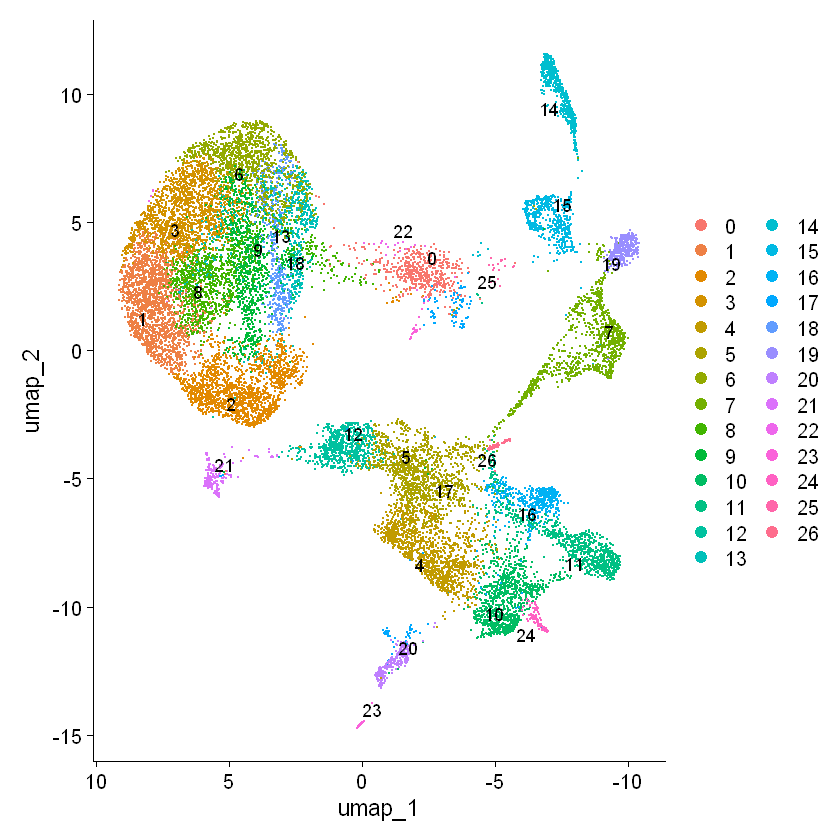

In [9]:
LabelClusters(plot = postTrans_rev_plot, id = "ident")

In [10]:
rownames(postTrans_rev)

[1] "MIR1302-2HG"       "FAM138A"           "OR4F5"            
    [4] "AL627309.1"        "AL627309.3"        "AL627309.2"       
    [7] "AL627309.5"        "AL627309.4"        "AP006222.2"       
   [10] "AL732372.1"        "OR4F29"            "AC114498.1"       
   [13] "OR4F16"            "AL669831.2"        "LINC01409"        
   [16] "FAM87B"            "LINC01128"         "LINC00115"        
   [19] "FAM41C"            "AL645608.6"        "AL645608.2"       
   [22] "AL645608.4"        "LINC02593"         "SAMD11"           
   [25] "NOC2L"             "KLHL17"            "PLEKHN1"          
   [28] "PERM1"             "AL645608.7"        "HES4"             
   [31] "ISG15"             "AL645608.1"        "AGRN"             
   [34] "AL645608.5"        "AL645608.8"        "RNF223"           
   [37] "C1orf159"          "AL390719.3"        "LINC01342"        
   [40] "AL390719.2"        "TTLL10-AS1"        "TTLL10"           
   [43] "TNFRSF18"          "TNFRSF4"           "SDF4"             
   [46] "B3GALT6"           "C1QTNF12"          "AL162741.1"       
   [49] "UBE2J2"            "LINC01786"         "SCNN1D"           
   [52] "ACAP3"             "PUSL1"             "INTS11"           
   [55] "AL139287.1"        "CPTP"              "TAS1R3"           
   [58] "DVL1"              "MXRA8"             "AURKAIP1"         
   [61] "CCNL2"             "MRPL20-AS1"        "MRPL20"           
   [64] "AL391244.2"        "ANKRD65"           "AL391244.1"       
   [67] "TMEM88B"           "LINC01770"         "VWA1"             
   [70] "ATAD3C"            "ATAD3B"            "ATAD3A"           
   [73] "TMEM240"           "SSU72"             "AL645728.1"       
   [76] "FNDC10"            "AL691432.4"        "AL691432.2"       
   [79] "MIB2"              "MMP23B"            "CDK11B"           
   [82] "FO704657.1"        "SLC35E2B"          "CDK11A"           
   [85] "SLC35E2A"          "NADK"              "GNB1"             
   [88] "AL109917.1"        "CALML6"            "TMEM52"           
   [91] "CFAP74"            "AL391845.2"        "GABRD"            
   [94] "AL391845.1"        "PRKCZ"             "AL590822.2"       
   [97] "PRKCZ-AS1"         "FAAP20"            "AL590822.1"       
  [100] "SKI"               "AL590822.3"        "MORN1"            
  [103] "AL589739.1"        "AL513477.2"        "RER1"             
  [106] "PEX10"             "PLCH2"             "AL139246.1"       
  [109] "AL139246.4"        "PANK4"             "HES5"             
  [112] "AL139246.5"        "TNFRSF14-AS1"      "TNFRSF14"         
  [115] "AL139246.3"        "PRXL2B"            "MMEL1"            
  [118] "AL831784.1"        "TTC34"             "AC242022.2"       
  [121] "AC242022.1"        "AL592464.2"        "AL592464.3"       
  [124] "AL592464.1"        "AL589702.1"        "ACTRT2"           
  [127] "PRDM16-DT"         "PRDM16"            "AL008733.1"       
  [130] "AL590438.1"        "AL354743.2"        "AL354743.1"       
  [133] "ARHGEF16"          "AL512413.1"        "MEGF6"            
  [136] "AL513320.1"        "TPRG1L"            "WRAP73"           
  [139] "TP73"              "AL136528.1"        "AL136528.2"       
  [142] "CCDC27"            "SMIM1"             "LRRC47"           
  [145] "AL365330.1"        "CEP104"            "DFFB"             
  [148] "C1orf174"          "LINC01134"         "LINC01346"        
  [151] "LINC01345"         "LINC02780"         "AL805961.1"       
  [154] "LINC01777"         "AL355602.1"        "Z98747.1"         
  [157] "LINC01646"         "AJAP1"             "Z98886.1"         
  [160] "BX005132.1"        "LINC02781"         "LINC02782"        
  [163] "AL139823.1"        "Z98259.3"          "Z98259.2"         
  [166] "Z98259.1"          "AL365255.1"        "NPHP4"            
  [169] "KCNAB2"            "CHD5"              "RPL22"            
  [172] "AL031847.1"        "RNF207"            "ICMT"             
  [175] "LINC00337"         "HES3"              "GPR153"    

In [11]:
nrow(postTrans_rev)

[1] 36601

In [12]:
colnames(postTrans_rev)

[1] "A_AAACGCTTCACTTGTT_A_pos"  "A_AAAGGATCAATGCAGG_A_pos" 
    [3] "A_AAAGGATGTGCGAGTA_A_pos"  "A_AAAGGATTCACTGATG_A_pos" 
    [5] "A_AAAGGGCCACCCTCTA_A_pos"  "A_AAAGGTAGTCGCATCG_A_pos" 
    [7] "A_AAAGGTATCATTGTGG_A_pos"  "A_AAAGGTATCCGAGGCT_A_pos" 
    [9] "A_AAAGGTATCGGTCACG_A_pos"  "A_AAAGGTATCTCGCAGG_A_pos" 
   [11] "A_AAAGTGACAAAGTATG_A_pos"  "A_AACAAAGAGGGCCCTT_A_pos" 
   [13] "A_AACAAAGGTGCTCTTC_A_pos"  "A_AACAAAGTCTGCATAG_A_pos" 
   [15] "A_AACACACAGCAAACAT_A_pos"  "A_AACACACAGCGAGGAG_A_pos" 
   [17] "A_AACACACTCTCAATCT_A_pos"  "A_AACCAACCAGAACCGA_A_pos" 
   [19] "A_AACCACAAGTCAACAA_A_pos"  "A_AACCACATCCATTGTT_A_pos" 
   [21] "A_AACCATGCAGTTCTAG_A_pos"  "A_AACCTGATCAAACGAA_A_pos" 
   [23] "A_AACGAAAAGTTGTCAC_A_pos"  "A_AACGGGAGTTGCAAGG_A_pos" 
   [25] "A_AACTTCTGTGTAAATG_A_pos"  "A_AACTTCTTCAGTGGGA_A_pos" 
   [27] "A_AACTTCTTCATGGAGG_A_pos"  "A_AAGACAAGTCAACGCC_A_pos" 
   [29] "A_AAGACTCGTGAATGAT_A_pos"  "A_AAGATAGCAATGCAAA_A_pos" 
   [31] "A_AAGATAGCACAGTCGC_A_pos"  "A_AAGATAGCAGTCAGTT_A_pos" 
   [33] "A_AAGATAGTCTCACGAA_A_pos"  "A_AAGCATCAGGCCGCTT_A_pos" 
   [35] "A_AAGCATCGTCATACCA_A_pos"  "A_AAGCCATCAATCTGCA_A_pos" 
   [37] "A_AAGCGTTAGTCCTGTA_A_pos"  "A_AAGGAATCACCCTATC_A_pos" 
   [39] "A_AAGGAATCATTGACAC_A_pos"  "A_AAGGTAAGTTCAGGTT_A_pos" 
   [41] "A_AAGTACCGTTGCGAAG_A_pos"  "A_AAGTCGTCAGTGAGCA_A_pos" 
   [43] "A_AAGTGAAGTATGTGTC_A_pos"  "A_AAGTGAAGTGACGTCC_A_pos" 
   [45] "A_AAGTTCGAGTCGAAAT_A_pos"  "A_AATAGAGAGTACAGCG_A_pos" 
   [47] "A_AATCACGGTATGAAGT_A_pos"  "A_AATCGACCAACTGGTT_A_pos" 
   [49] "A_AATCGACCAATTGAAG_A_pos"  "A_AATCGTGAGGCTCTAT_A_pos" 
   [51] "A_AATCGTGGTAGTCGTT_A_pos"  "A_AATGAAGGTGAGCAGT_A_pos" 
   [53] "A_AATGACCGTCCTGTTC_A_pos"  "A_AATGCCACAACTCATG_A_pos" 
   [55] "A_AATGCCAGTCACCTTC_A_pos"  "A_AATGCCATCCCAAGCG_A_pos" 
   [57] "A_AATGGAACAGATGCGA_A_pos"  "A_AATGGAAGTAGACGGT_A_pos" 
   [59] "A_AATGGCTGTATCGTAC_A_pos"  "A_AATTTCCAGGGTATAT_A_pos" 
   [61] "A_AATTTCCGTACAGGTG_A_pos"  "A_ACAAAGACAAGTAGTA_A_pos" 
   [63] "A_ACAACCAAGTTGCCCG_A_pos"  "A_ACAACCACATGAATAG_A_pos" 
   [65] "A_ACAAGCTCATCGTGGC_A_pos"  "A_ACACAGTCAAATGCTC_A_pos" 
   [67] "A_ACACCAACAACTCGAT_A_pos"  "A_ACACCAAGTATCGTGT_A_pos" 
   [69] "A_ACACTGAAGTCCTGCG_A_pos"  "A_ACACTGAGTACCGTGC_A_pos" 
   [71] "A_ACAGCCGTCTAGTACG_A_pos"  "A_ACAGGGATCTGCGGGT_A_pos" 
   [73] "A_ACATCCCTCTCGTCAC_A_pos"  "A_ACATCGAGTATTGAGA_A_pos" 
   [75] "A_ACATCGAGTGAGTGAC_A_pos"  "A_ACATGCATCTCGACGG_A_pos" 
   [77] "A_ACATTTCTCATCCCGT_A_pos"  "A_ACCAAACAGGATATAC_A_pos" 
   [79] "A_ACCACAAGTGACCTGC_A_pos"  "A_ACCATTTTCGATAACC_A_pos" 
   [81] "A_ACCCAAACATCCTGTC_A_pos"  "A_ACCCTCAGTCTGCAAT_A_pos" 
   [83] "A_ACCCTTGAGCCGAACA_A_pos"  "A_ACCCTTGCAATTTCCT_A_pos" 
   [85] "A_ACCCTTGGTCAGTCTA_A_pos"  "A_ACCTGAAAGCCTATCA_A_pos" 
   [87] "A_ACCTGAATCAGAGTGG_A_pos"  "A_ACCTGTCGTCGAGTGA_A_pos" 
   [89] "A_ACCTGTCTCATGAGAA_A_pos"  "A_ACCTGTCTCGGTAGAG_A_pos" 
   [91] "A_ACGATCACACCATAAC_A_pos"  "A_ACGATCATCGCTGTTC_A_pos" 
   [93] "A_ACGATGTAGGGCATGT_A_pos"  "A_ACGATGTTCATGTCAG_A_pos" 
   [95] "A_ACGATGTTCCACCCTA_A_pos"  "A_ACGCACGAGTCGGCCT_A_pos" 
   [97] "A_ACGCACGGTAGCGCTC_A_pos"  "A_ACGGAAGGTTGCAAGG_A_pos" 
   [99] "A_ACGGGTCAGTCCTGTA_A_pos"  "A_ACGGGTCCATCCAACA_A_pos" 
  [101] "A_ACGGTTAGTTATAGAG_A_pos"  "A_ACGTAACCATCCTATT_A_pos" 
  [103] "A_ACGTAACTCCCACAGG_A_pos"  "A_ACGTAACTCTGTACAG_A_pos" 
  [105] "A_ACGTACAAGTAAGCAT_A_pos"  "A_ACGTACATCCTGCTAC_A_pos" 
  [107] "A_ACGTCCTTCTCCTGAC_A_pos"  "A_ACGTTCCGTCGCACAC_A_pos" 
  [109] "A_ACGTTCCTCCTACCGT_A_pos"  "A_ACGTTCCTCTACTTCA_A_pos" 
  [111] "A_ACTACGAAGCTCCACG_A_pos"  "A_ACTACGACAAGAGATT_A_pos" 
  [113] "A_ACTACGAGTGTCCGGT_A_pos"  "A_ACTACGAGTTGCTCAA_A_pos" 
  [115] "A_ACTACGATCTATGCCC_A_pos"  "A_ACTATCTAGAAACTAC_A_pos" 
  [117] "A_ACTATCTAGACTCTTG_A_pos"  "A_ACTATGGAGAAGTCAT_A_pos" 
  [119] "A_ACTATGGCACGGATCC_A_pos"  "A_ACTATGGCACGGTGTC_A_pos" 
  [121] "A_ACTATGGTCCATAAGC_A_pos"  "A_ACTATTCCAACTGGTT_A_pos" 
  [123] "A_ACTATTCCATCCGTTC_A_pos"  "A_ACTATTCTCCCTTGGT_A_pos" 
  [125] "A_ACTCCCAAGCGGGTTA_A_pos"  

In [13]:
ncol(postTrans_rev)

[1] 20229

### Import Nature Methods dataset

In [14]:
nature_spectra_path <- "cNMF4.spectra.k_35.dt_0_15.consensus.txt"

In [15]:
spectra.t <- read.table("cNMF4.spectra.k_35.dt_0_15.consensus.txt", header = TRUE, sep = "\t")
spectra.t

X  ABCA13       ABHD17B      ABHD8        ABLIM1       AC002480.5  
1   1 4.037138e-04 1.290061e-04 0.000000e+00 0.000000e+00 0.000000e+00
2   2 1.626081e-03 1.903653e-04 5.273402e-04 6.913273e-04 4.248614e-04
3   3 4.665727e-08 1.557317e-04 0.000000e+00 8.398596e-04 3.834534e-04
4   4 3.927303e-04 1.156419e-03 3.044580e-04 3.585300e-03 0.000000e+00
5   5 1.485559e-05 0.000000e+00 6.923341e-04 2.612954e-04 0.000000e+00
6   6 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
7   7 6.565215e-04 0.000000e+00 0.000000e+00 3.875568e-04 1.135598e-03
8   8 1.233864e-03 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
9   9 4.239189e-06 0.000000e+00 1.606618e-04 2.035585e-04 5.098308e-04
10 10 5.547900e-04 5.059033e-04 0.000000e+00 8.596243e-04 0.000000e+00
11 11 1.217689e-03 9.022430e-04 5.632150e-04 1.347342e-03 4.308050e-04
12 12 8.531845e-04 5.170983e-04 0.000000e+00 9.847204e-04 1.098482e-03
13 13 4.184893e-04 2.215734e-06 2.289249e-04 5.981672e-04 6.013995e-04
14 14 0.000000e+00 4.535662e-04 7.293096e-05 0.000000e+00 2.844888e-04
15 15 0.000000e+00 1.590199e-03 1.446419e-04 8.208146e-04 0.000000e+00
16 16 1.108845e-04 4.847891e-05 4.153462e-04 0.000000e+00 3.179366e-05
17 17 8.993112e-04 1.015927e-03 2.630703e-05 9.821467e-04 0.000000e+00
18 18 7.151618e-04 5.716209e-04 0.000000e+00 3.261105e-04 3.080334e-04
19 19 5.513770e-04 8.116291e-04 1.203070e-04 6.080837e-04 0.000000e+00
20 20 7.750151e-05 0.000000e+00 0.000000e+00 1.348844e-04 9.379181e-04
21 21 0.000000e+00 7.108780e-04 0.000000e+00 0.000000e+00 0.000000e+00
22 22 0.000000e+00 6.826314e-04 3.096971e-04 0.000000e+00 1.230555e-04
23 23 3.193988e-04 8.976777e-05 1.847036e-04 2.814125e-05 1.411478e-04
24 24 8.710215e-04 2.004461e-04 3.444361e-04 8.114488e-04 9.593244e-04
25 25 1.320104e-04 6.683508e-04 3.173731e-04 2.216175e-04 1.076262e-04
26 26 1.013595e-04 2.666436e-03 1.443893e-04 1.302009e-03 0.000000e+00
27 27 5.636627e-04 1.094220e-03 6.750824e-04 1.199486e-03 4.715937e-04
28 28 8.096857e-04 1.187854e-03 3.227013e-04 7.818766e-04 2.873574e-04
29 29 6.365077e-04 0.000000e+00 5.032133e-05 2.017050e-05 1.123267e-03
30 30 5.717145e-04 3.269959e-04 6.589218e-05 0.000000e+00 3.152334e-04
31 31 1.667247e-03 4.349813e-04 1.031603e-04 2.751738e-04 5.243027e-04
32 32 0.000000e+00 0.000000e+00 0.000000e+00 7.043735e-05 0.000000e+00
33 33 2.264420e-03 5.952133e-04 4.102440e-04 1.127056e-03 7.408846e-04
34 34 5.760272e-04 0.000000e+00 1.017690e-03 2.968028e-04 4.189424e-03
35 35 8.076889e-04 6.225238e-04 3.098097e-04 5.365563e-04 9.543239e-05
   AC002985.3   AC003664.1   AC004510.3   AC004691.5   ⋯ ZNF720      
1  0.000000e+00 0.000000e+00 0.000000e+00 2.561031e-05 ⋯ 3.200771e-04
2  1.121366e-04 2.541363e-04 3.616895e-04 2.634976e-04 ⋯ 8.402400e-04
3  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 ⋯ 3.167402e-04
4  0.000000e+00 2.894145e-04 0.000000e+00 0.000000e+00 ⋯ 5.253167e-04
5  0.000000e+00 0.000000e+00 5.481140e-04 0.000000e+00 ⋯ 0.000000e+00
6  0.000000e+00 3.254937e-05 0.000000e+00 0.000000e+00 ⋯ 3.182447e-04
7  0.000000e+00 0.000000e+00 5.369790e-04 1.017732e-03 ⋯ 7.578034e-04
8  0.000000e+00 0.000000e+00 7.096593e-04 0.000000e+00 ⋯ 0.000000e+00
9  2.671265e-04 2.714242e-05 3.574184e-04 0.000000e+00 ⋯ 0.000000e+00
10 2.324184e-04 8.616028e-04 0.000000e+00 0.000000e+00 ⋯ 4.959945e-04
11 0.000000e+00 3.198534e-04 0.000000e+00 0.000000e+00 ⋯ 3.307854e-04
12 0.000000e+00 1.951399e-04 9.897244e-06 2.566030e-04 ⋯ 2.907612e-04
13 0.000000e+00 3.679396e-05 1.005813e-05 7.999285e-04 ⋯ 2.413497e-02
14 0.000000e+00 0.000000e+00 0.000000e+00 1.821001e-05 ⋯ 5.272424e-04
15 0.000000e+00 5.756140e-05 1.568141e-05 0.000000e+00 ⋯ 4.146348e-04
16 2.680525e-04 2.914327e-04 7.511006e-04 1.004191e-03 ⋯ 0.000000e+00
17 0.000000e+00 3.752736e-04 0.000000e+00 2.575940e-04 ⋯ 1.339965e-03
18 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 ⋯ 3.118307e-04
19 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 ⋯ 5.087528e-04
20 1.327652e-04 7.214894e-04 9.492238e-04 0.000

### Running starCAT (w/o intersection)

In [16]:
postTrans_rev@meta.data %>% colnames

[1] "orig.ident"                         "nCount_RNA"                        
 [3] "nFeature_RNA"                       "percent.mt"                        
 [5] "sample"                             "barcode"                           
 [7] "CD34_subsample"                     "CD34"                              
 [9] "nCount_HTO"                         "nFeature_HTO"                      
[11] "Doublet_Scores"                     "Predicted_Status"                  
[13] "HTO_maxID"                          "HTO_secondID"                      
[15] "HTO_margin"                         "HTO_classification"                
[17] "HTO_classification.global"          "hash.ID"                           
[19] "adjusted.hash.ID"                   "RNA_snn_res.0.5"                   
[21] "seurat_clusters"                    "predicted.celltype.l2.score"       
[23] "predicted.celltype.l2"              "predicted.celltype.l1.score"       
[25] "predicted.celltype.l1"              "mapping.score"                     
[27] "patient"                            "timepoint"                         
[29] "bc_seq"                             "timepoint_category"                
[31] "leiden.cell_type"                   "azimuth.l2.less_granular.cell_type"
[33] "demultiplexed_bc"                   "unintegrated_clusters"             
[35] "RNA_snn_res.1"                      "transfer_name"                     
[37] "label"                              "seurat_clusters_resolution_0.1"    
[39] "seurat_clusters_resolution_0.2"     "seurat_clusters_resolution_0.3"    
[41] "seurat_clusters_resolution_0.4"     "seurat_clusters_resolution_0.5"    
[43] "seurat_clusters_resolution_0.6"     "seurat_clusters_resolution_0.7"    
[45] "seurat_clusters_resolution_0.8"     "seurat_clusters_resolution_0.9"    
[47] "seurat_clusters_resolution_1"

In [17]:
counts = postTrans_rev[["RNA"]]$counts

In [18]:
counts[1:5, 1:5]

5 x 5 sparse Matrix of class "dgCMatrix"
            A_AAACGCTTCACTTGTT_A_pos A_AAAGGATCAATGCAGG_A_pos
MIR1302-2HG                        .                        .
FAM138A                            .                        .
OR4F5                              .                        .
AL627309.1                         .                        .
AL627309.3                         .                        .
            A_AAAGGATGTGCGAGTA_A_pos A_AAAGGATTCACTGATG_A_pos
MIR1302-2HG                        .                        .
FAM138A                            .                        .
OR4F5                              .                        .
AL627309.1                         .                        .
AL627309.3                         .                        .
            A_AAAGGGCCACCCTCTA_A_pos
MIR1302-2HG                        .
FAM138A                            .
OR4F5                              .
AL627309.1                         .
AL627309.3                    

In [19]:
data_dir = "Data/First/"

In [20]:
# # Output counts matrix
# writeMM(counts, paste0(data_dir, 'matrix.mtx'))
# gzip(paste0(data_dir, 'matrix.mtx'))

# # Output cell barcodes
# barcodes <- colnames(counts)
# write_delim(as.data.frame(barcodes), paste0(data_dir, 'barcodes.tsv'),
#            col_names = FALSE)
# gzip(paste0(data_dir, 'barcodes.tsv'))

# # Output feature names
# gene_names <- rownames(counts)
# features <- data.frame("gene_id" = gene_names,"gene_name" = gene_names,type = "Gene Expression")
# write_delim(as.data.frame(features),delim = "\t", paste0(data_dir, 'features.tsv'),
#            col_names = FALSE)
# gzip(paste0(data_dir, 'features.tsv'))

In [21]:
output_name = 'postTrans_starCAT'
counts_fn = paste0(data_dir, 'matrix.mtx.gz')

In [22]:
cmd = paste0('starcat', 
    ' --reference ', '"cNMF4.spectra.k_35.dt_0_15.consensus.txt"',
    ' --counts ', '"', counts_fn, '"', 
    ' --output-dir ', '"', data_dir, '"', 
    ' --name ', '"', output_name, '"' 
)
cmd

[1] "starcat --reference \"cNMF4.spectra.k_35.dt_0_15.consensus.txt\" --counts \"Data/First/matrix.mtx.gz\" --output-dir \"Data/First/\" --name \"postTrans_starCAT\""

```
starcat --reference "cNMF4.spectra.k_35.dt_0_15.consensus.txt" --counts "Data/matrix.mtx.gz" --output-dir "Data/" --name "postTrans_starCAT"
Using user specified reference spectra file cNMF4.spectra.k_35.dt_0_15.consensus.txt
No scores provided
1159 out of 2000 genes in the reference overlap with the query
C:\Users\Albert\AppData\Local\Programs\Python\Python312\Lib\site-packages\starcat\starcat.py:253: UserWarning: WARNING!: query input has 64 genes with 0 counts after overlapping with query. Normalized values for these genes are set to 0.
  warnings.warn("""WARNING!: query input has %d genes with 0 counts after overlapping with query. Normalized values for these genes are set to 0.""" % num_zeros, UserWarning)
Saving usages to Data/postTrans_starCAT.rf_usage_normalized.txt
```

### Running starCAT (w/ gene intersections)

#### Find intersection

In [23]:
data <- read.table("cNMF4.spectra.k_35.dt_0_15.consensus.txt", header=TRUE, sep="\t", check.names=FALSE)

In [24]:
# write.csv(data, "cNMF4.spectra.k_35.dt_0_15.consensus.csv", row.names=FALSE)

gcontri are the scores from the gene contribution reference used for the starCAT run

In [25]:
gcontri <- read.csv("cNMF4.spectra.k_35.dt_0_15.consensus.csv")

In [26]:
head(gcontri)

X ABCA13       ABHD17B      ABHD8        ABLIM1       AC002480.5  
1 1 4.037138e-04 0.0001290061 0.0000000000 0.0000000000 0.0000000000
2 2 1.626081e-03 0.0001903653 0.0005273402 0.0006913273 0.0004248614
3 3 4.665727e-08 0.0001557317 0.0000000000 0.0008398596 0.0003834534
4 4 3.927303e-04 0.0011564193 0.0003044580 0.0035852997 0.0000000000
5 5 1.485559e-05 0.0000000000 0.0006923341 0.0002612954 0.0000000000
6 6 0.000000e+00 0.0000000000 0.0000000000 0.0000000000 0.0000000000
  AC002985.3   AC003664.1   AC004510.3   AC004691.5   ⋯ ZNF720      
1 0.0000000000 0.000000e+00 0.0000000000 2.561031e-05 ⋯ 0.0003200771
2 0.0001121366 2.541363e-04 0.0003616895 2.634976e-04 ⋯ 0.0008402400
3 0.0000000000 0.000000e+00 0.0000000000 0.000000e+00 ⋯ 0.0003167402
4 0.0000000000 2.894145e-04 0.0000000000 0.000000e+00 ⋯ 0.0005253167
5 0.0000000000 0.000000e+00 0.0005481140 0.000000e+00 ⋯ 0.0000000000
6 0.0000000000 3.254937e-05 0.0000000000 0.000000e+00 ⋯ 0.0003182447
  ZNF726       ZNF76        ZNF770       ZNF790.AS1   ZNF792       ZNF829      
1 0.0000000000 0.0001795445 2.639891e-05 0.0000000000 0.000000e+00 0.0003220853
2 0.0013318075 0.0010710524 5.805588e-04 0.0004699305 4.034231e-04 0.0008789362
3 0.0002426609 0.0004861702 0.000000e+00 0.0000000000 4.612713e-05 0.0003570141
4 0.0005072930 0.0002092257 1.664867e-03 0.0004782508 1.266647e-03 0.0006441579
5 0.0001213477 0.0000000000 3.268598e-05 0.0000000000 0.000000e+00 0.0000449167
6 0.0000000000 0.0001496780 0.000000e+00 0.0008851968 1.810611e-04 0.0005093236
  ZNF98        ZRANB2       ZSCAN29     
1 0.0000000000 0.0003323041 0.0010468175
2 0.0007264804 0.0005293305 0.0008734031
3 0.0000000000 0.0003216228 0.0013626373
4 0.0000000000 0.0021052803 0.0007594478
5 0.0000000000 0.0000000000 0.0000000000
6 0.0001308876 0.0001509837 0.0000000000

In [27]:
gcontri <- gcontri[, -1]

In [28]:
head(gcontri)

ABCA13       ABHD17B      ABHD8        ABLIM1       AC002480.5   AC002985.3  
1 4.037138e-04 0.0001290061 0.0000000000 0.0000000000 0.0000000000 0.0000000000
2 1.626081e-03 0.0001903653 0.0005273402 0.0006913273 0.0004248614 0.0001121366
3 4.665727e-08 0.0001557317 0.0000000000 0.0008398596 0.0003834534 0.0000000000
4 3.927303e-04 0.0011564193 0.0003044580 0.0035852997 0.0000000000 0.0000000000
5 1.485559e-05 0.0000000000 0.0006923341 0.0002612954 0.0000000000 0.0000000000
6 0.000000e+00 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000
  AC003664.1   AC004510.3   AC004691.5   AC004869.3   ⋯ ZNF720      
1 0.000000e+00 0.0000000000 2.561031e-05 8.771725e-05 ⋯ 0.0003200771
2 2.541363e-04 0.0003616895 2.634976e-04 4.880627e-04 ⋯ 0.0008402400
3 0.000000e+00 0.0000000000 0.000000e+00 7.430923e-04 ⋯ 0.0003167402
4 2.894145e-04 0.0000000000 0.000000e+00 0.000000e+00 ⋯ 0.0005253167
5 0.000000e+00 0.0005481140 0.000000e+00 0.000000e+00 ⋯ 0.0000000000
6 3.254937e-05 0.0000000000 0.000000e+00 0.000000e+00 ⋯ 0.0003182447
  ZNF726       ZNF76        ZNF770       ZNF790.AS1   ZNF792       ZNF829      
1 0.0000000000 0.0001795445 2.639891e-05 0.0000000000 0.000000e+00 0.0003220853
2 0.0013318075 0.0010710524 5.805588e-04 0.0004699305 4.034231e-04 0.0008789362
3 0.0002426609 0.0004861702 0.000000e+00 0.0000000000 4.612713e-05 0.0003570141
4 0.0005072930 0.0002092257 1.664867e-03 0.0004782508 1.266647e-03 0.0006441579
5 0.0001213477 0.0000000000 3.268598e-05 0.0000000000 0.000000e+00 0.0000449167
6 0.0000000000 0.0001496780 0.000000e+00 0.0008851968 1.810611e-04 0.0005093236
  ZNF98        ZRANB2       ZSCAN29     
1 0.0000000000 0.0003323041 0.0010468175
2 0.0007264804 0.0005293305 0.0008734031
3 0.0000000000 0.0003216228 0.0013626373
4 0.0000000000 0.0021052803 0.0007594478
5 0.0000000000 0.0000000000 0.0000000000
6 0.0001308876 0.0001509837 0.0000000000

In [29]:
nrow(gcontri)

[1] 35

In [30]:
ncol(gcontri)

[1] 2000

In [31]:
colnames(gcontri)

[1] "ABCA13"          "ABHD17B"         "ABHD8"           "ABLIM1"         
   [5] "AC002480.5"      "AC002985.3"      "AC003664.1"      "AC004510.3"     
   [9] "AC004691.5"      "AC004869.3"      "AC005082.12"     "AC005160.3"     
  [13] "AC005618.6"      "AC005943.6"      "AC006116.12"     "AC006486.10"    
  [17] "AC006942.4"      "AC007091.1"      "AC007249.3"      "AC007325.2"     
  [21] "AC007557.1"      "AC008063.2"      "AC008073.7"      "AC008079.9"     
  [25] "AC008592.4"      "AC009133.21"     "AC009134.1"      "AC009336.19"    
  [29] "AC009506.1"      "AC010468.2"      "AC010731.3"      "AC010761.6"     
  [33] "AC010907.5"      "AC010974.3"      "AC012307.2"      "AC013269.4"     
  [37] "AC013463.2"      "AC015688.3"      "AC016991.1"      "AC017074.1"     
  [41] "AC018685.1"      "AC018816.3"      "AC020594.5"      "AC034228.4"     
  [45] "AC068831.3"      "AC073071.1"      "AC073316.1"      "AC092625.1"     
  [49] "AC093620.5"      "AC099668.5"      "AC104534.3"      "AC105053.3"     
  [53] "AC107057.1"      "AC114765.1"      "AC118345.1"      "AC118754.4"     
  [57] "AC127904.2"      "AC130689.5"      "AC131056.3"      "AC131263.1"     
  [61] "AC132217.4"      "AC136616.3"      "AC144568.2"      "AC144836.1"     
  [65] "AC233755.2"      "AC243756.1"      "ACTB"            "ACTG1"          
  [69] "ACTR2"           "ACTR5"           "ADAMTS1"         "ADAMTS19.AS1"   
  [73] "ADCYAP1R1"       "ADO"             "ADPRM"           "AF003626.1"     
  [77] "AF131215.9"      "AFAP1L1"         "AFP"             "AGAP4"          
  [81] "AGBL1"           "AGBL4.IT1"       "AHCTF1"          "AHSG"           
  [85] "AHSP"            "AK5"             "AKAP12"          "AKIRIN1"        
  [89] "AL049872.1"      "AL050303.10"     "AL357140.1"      "ALAD"           
  [93] "ALB"             "ALDH5A1"         "ALOX12B"         "ALOX5AP"        
  [97] "ALOXE3"          "ALYREF"          "ANKH"            "ANKIB1"         
 [101] "ANKRA2"          "ANKRD11"         "ANKRD22"         "ANKRD36C"       
 [105] "ANKRD50"         "ANKRD63"         "ANP32E"          "ANXA1"          
 [109] "ANXA2"           "ANXA5"           "AOC1"            "AP000251.3"     
 [113] "AP000431.2"      "AP000797.4"      "AP001055.6"      "AP001059.5"     
 [117] "AP001059.7"      "AP001464.4"      "AP001607.1"      "AP002856.7"     
 [121] "AP006748.1"      "AP1AR"           "AP1S2"           "AP2M1"          
 [125] "APLNR"           "APLP1"           "APOA1"           "APOA2"          
 [129] "APOBEC3B.AS1"    "APOC3"           "APOD"            "APOE"           
 [133] "APOH"            "APOLD1"          "APOOL"           "AQR"            
 [137] "AREG"            "ARF6"            "ARFGAP3"         "ARHGAP19"       
 [141] "ARHGEF2"         "ARID1A"          "ARL3"            "ARL4C"          
 [145] "ARL6IP1"         "ARMC5"           "ARMC9"           "ARNT"           
 [149] "ARPC5"           "ARPP21"          "ARV1"            "ASB15"          
 [153] "ASF1A"           "ASIC2"           "ASPM"            "ATF1"           
 [157] "ATF4"            "ATF5"            "ATP1B3"          "ATP2B2.IT2"     
 [161] "ATP2B4"          "ATP6AP2"         "ATP6V1C2"        "ATRX"           
 [165] "AURKB"           "AXIN2"           "AZIN1"           "AZU1"           
 [169] "B2M"             "BACE1.AS"        "BACH2"           "BARHL1"         
 [173] "BASP1"           "BAZ2A"           "BBC3"            "BCDIN3D"        
 [177] "BCL11A"          "BCL2L1"          "BCL6B"           "BCL7A"          
 [181] "BCLAF1"          "BCO1"            "BCOR"            "BCYRN1"         
 [185] "BIRC3"           "BLNK"            "BMI1"            "BOLL"           
 [189] "BPGM"            "BPTF"            "BTG1"            "BTG2"           
 [193] "BTN2A1"          "BX072566.1"      "C10orf10"        "C10orf71"       
 [197] "C11orf57"        "C16orf54"        "C17orf58"        "C19orf44"       
 [201] "C19orf68"        "C1QA"            "C1QB"    

In [32]:
common_genes <- intersect(rownames(postTrans_rev), colnames(gcontri))

Intersection was run on the rows of postTrans_rev (dataset with percent.mt >= 10). There are a total of 36601 rows in postTrans_rev.

In [33]:
common_genes

[1] "MXRA8"      "HES5"       "MEGF6"      "ZBTB48"     "AL357140.1"
   [6] "UBE4B"      "EXOSC10"    "HNRNPCL4"   "CASP9"      "C1QA"      
  [11] "C1QC"       "C1QB"       "LUZP1"      "HNRNPR"     "E2F2"      
  [16] "ID3"        "PNRC2"      "STMN1"      "DHDDS"      "HMGN2"     
  [21] "ARID1A"     "SFN"        "FCN3"       "TAF12"      "GMEB1"     
  [26] "LAPTM5"     "CCDC28B"    "GJA4"       "SFPQ"       "YRDC"      
  [31] "AKIRIN1"    "RLF"        "CDKN2C"     "CDCP2"      "PCSK9"     
  [36] "PLPP3"      "OMA1"       "JUN"        "USP1"       "MIER1"     
  [41] "GADD45A"    "LRRC40"     "ZRANB2"     "AK5"        "RPF1"      
  [46] "LMO4"       "RTCA"       "SLC25A24"   "HENMT1"     "PRPF38B"   
  [51] "STXBP3"     "CLCC1"      "CELSR2"     "LRIF1"      "RAP1A"     
  [56] "VTCN1"      "ZNF697"     "TXNIP"      "FMO5"       "GJA5"      
  [61] "ANP32E"     "MCL1"       "CTSS"       "ARNT"       "OAZ3"      
  [66] "S100A10"    "S100A11"    "LCE1F"      "SPRR2E"     "S100A9"    
  [71] "S100A12"    "S100A8"     "C1orf43"    "EFNA1"      "SYT11"     
  [76] "ARHGEF2"    "PEAR1"      "CD5L"       "MNDA"       "FCER1A"    
  [81] "VANGL2"     "APOA2"      "HSPA6"      "FCGR3A"     "RCSD1"     
  [86] "XCL2"       "PRRC2C"     "KLHL20"     "GAS5"       "RABGAP1L"  
  [91] "CEP350"     "IER5"       "ARPC5"      "RNF2"       "IVNS1ABP"  
  [96] "RGS18"      "RGS1"       "RGS2"       "GLRX2"      "CFHR2"     
 [101] "ASPM"       "CACNA1S"    "BTG2"       "ATP2B4"     "ZC3H11A"   
 [106] "TMEM81"     "ELK4"       "NUCKS1"     "FCMR"       "YOD1"      
 [111] "G0S2"       "CENPF"      "KCTD3"      "LBR"        "SDE2"      
 [116] "GALNT2"     "ARV1"       "GNPAT"      "EGLN1"      "GGPS1"     
 [121] "ZBTB18"     "COX20"      "AHCTF1"     "PXDN"       "AC018685.1"
 [126] "COLEC11"    "AC107057.1" "CMPK2"      "KIDINS220"  "KLF11"     
 [131] "RRM2"       "HPCAL1"     "ATP6V1C2"   "PDIA6"      "SMC6"      
 [136] "RDH14"      "DNMT3A"     "RAB10"      "CENPA"      "CCDC121"   
 [141] "CRIM1"      "ZFP36L2"    "SIX3"       "CALM2"      "ERLEC1"    
 [146] "RTN4"       "BCL11A"     "VPS54"      "ACTR2"      "AC118345.1"
 [151] "CNRIP1"     "PLEK"       "EGR4"       "NAT8"       "WDR54"     
 [156] "LBX2"       "HTRA2"      "LOXL3"      "RETSAT"     "IMMT"      
 [161] "RMND5A"     "FABP1"      "THNSL2"     "IGKC"       "ANKRD36C"  
 [166] "ITPRIPL1"   "FAM178B"    "CNOT11"     "MAP4K4"     "TMEM182"   
 [171] "UXS1"       "GCC2"       "ZC3H8"      "IL1B"       "RABL2A"    
 [176] "AC017074.1" "DBI"        "GPR17"      "DARS"       "CXCR4"     
 [181] "AC092625.1" "NR4A2"      "AC009506.1" "RBMS1"      "AC008063.2"
 [186] "PPIG"       "CWC22"      "LINC01473"  "COL3A1"     "SLC40A1"   
 [191] "SLC39A10"   "MARS2"      "BOLL"       "FZD7"       "INO80D"    
 [196] "AC010731.3" "UNC80"      "AC007557.1" "SCG2"       "TRIP12"    
 [201] "ARMC9"      "NCL"        "PDE6D"      "UGT1A9"     "ARL4C"     
 [206] "LINC01173"  "CIDEC"      "IL17RE"     "CHCHD4"     "RAB5A"     
 [211] "NR1D2"      "TOP2B"      "CMTM8"      "CMTM7"      "ARPP21"    
 [216] "GOLGA4"     "CSRNP1"     "KIAA1143"   "EXOSC7"     "SLC26A6"   
 [221] "P4HTM"      "USP19"      "WDR82"      "DNASE1L3"   "GBE1"      
 [226] "CGGBP1"     "LINC00879"  "LINC00488"  "DPPA4"      "COX17"     
 [231] "PARP9"      "MYLK"       "CCDC14"     "ZNF148"     "SNX4"      
 [236] "ROPN1B"     "GATA2"      "GP9"        "CNBP"       "H1FX"      
 [241] "CDV3"       "SLC25A36"   "RASA2"      "ATP1B3"     "SIAH2"     
 [246] "P2RY14"     "RAP2B"      "MME"        "SCHIP1"     "C3orf80"   
 [251] "SMC4"       "SLITRK3"    "SERPINI1"   "GOLIM4"     "PRKCI"     
 [256] "TTC14"      "DCUN1D1"    "KLHL24"     "DVL3"       "AP2M1"     
 [261] "AHSG"       "RFC4"       "RTP4"       "CLDN1"      "HES1"      
 [266] "TMEM44"     "APOD"       "MELTF"      "DGKQ"       "SLBP"      
 [271] "CYTL1"      "MRFAP1"     "S100P"      "MRFAP1L1"   "FBXL5"     
 [276] "TAPT1"      "LDB2"       "MED28"   

In [34]:
length(common_genes)

[1] 1159

In [35]:
postTrans_rev_common <- subset(postTrans_rev, features = common_genes)

In [36]:
dim(postTrans_rev_common)

[1]  1159 20229

#### Run starCAT on intersection

In [37]:
postTrans_rev_common@meta.data %>% colnames

[1] "orig.ident"                         "nCount_RNA"                        
 [3] "nFeature_RNA"                       "percent.mt"                        
 [5] "sample"                             "barcode"                           
 [7] "CD34_subsample"                     "CD34"                              
 [9] "nCount_HTO"                         "nFeature_HTO"                      
[11] "Doublet_Scores"                     "Predicted_Status"                  
[13] "HTO_maxID"                          "HTO_secondID"                      
[15] "HTO_margin"                         "HTO_classification"                
[17] "HTO_classification.global"          "hash.ID"                           
[19] "adjusted.hash.ID"                   "RNA_snn_res.0.5"                   
[21] "seurat_clusters"                    "predicted.celltype.l2.score"       
[23] "predicted.celltype.l2"              "predicted.celltype.l1.score"       
[25] "predicted.celltype.l1"              "mapping.score"                     
[27] "patient"                            "timepoint"                         
[29] "bc_seq"                             "timepoint_category"                
[31] "leiden.cell_type"                   "azimuth.l2.less_granular.cell_type"
[33] "demultiplexed_bc"                   "unintegrated_clusters"             
[35] "RNA_snn_res.1"                      "transfer_name"                     
[37] "label"                              "seurat_clusters_resolution_0.1"    
[39] "seurat_clusters_resolution_0.2"     "seurat_clusters_resolution_0.3"    
[41] "seurat_clusters_resolution_0.4"     "seurat_clusters_resolution_0.5"    
[43] "seurat_clusters_resolution_0.6"     "seurat_clusters_resolution_0.7"    
[45] "seurat_clusters_resolution_0.8"     "seurat_clusters_resolution_0.9"    
[47] "seurat_clusters_resolution_1"

In [38]:
counts = postTrans_rev_common[["RNA"]]$counts

In [39]:
counts[1:5, 1:5]

5 x 5 sparse Matrix of class "dgCMatrix"
           A_AAACGCTTCACTTGTT_A_pos A_AAAGGATCAATGCAGG_A_pos
MXRA8                             .                        .
HES5                              .                        .
MEGF6                             .                        .
ZBTB48                            1                        1
AL357140.1                        .                        .
           A_AAAGGATGTGCGAGTA_A_pos A_AAAGGATTCACTGATG_A_pos
MXRA8                             .                        .
HES5                              .                        .
MEGF6                             .                        .
ZBTB48                            .                        1
AL357140.1                        .                        .
           A_AAAGGGCCACCCTCTA_A_pos
MXRA8                             .
HES5                              .
MEGF6                             5
ZBTB48                            .
AL357140.1                        .

In [40]:
data_dir = "Data/Second/"

In [41]:
# # Output counts matrix
# writeMM(counts, paste0(data_dir, 'matrix.mtx'))
# gzip(paste0(data_dir, 'matrix.mtx'))

# # Output cell barcodes
# barcodes <- colnames(counts)
# write_delim(as.data.frame(barcodes), paste0(data_dir, 'barcodes.tsv'),
#            col_names = FALSE)
# gzip(paste0(data_dir, 'barcodes.tsv'))

# # Output feature names
# gene_names <- rownames(counts)
# features <- data.frame("gene_id" = gene_names,"gene_name" = gene_names,type = "Gene Expression")
# write_delim(as.data.frame(features),delim = "\t", paste0(data_dir, 'features.tsv'),
#            col_names = FALSE)
# gzip(paste0(data_dir, 'features.tsv'))

In [42]:
output_name = 'postTrans_common_starCAT'
counts_fn = paste0(data_dir, 'matrix.mtx.gz')

In [43]:
cmd = paste0('starcat', 
    ' --reference ', '"cNMF4.spectra.k_35.dt_0_15.consensus.txt"',
    ' --counts ', '"', counts_fn, '"', 
    ' --output-dir ', '"', data_dir, '"', 
    ' --name ', '"', output_name, '"' 
)
cmd

[1] "starcat --reference \"cNMF4.spectra.k_35.dt_0_15.consensus.txt\" --counts \"Data/Second/matrix.mtx.gz\" --output-dir \"Data/Second/\" --name \"postTrans_common_starCAT\""

```
starcat --reference "cNMF4.spectra.k_35.dt_0_15.consensus.txt" --counts "Data/Second/matrix.mtx.gz" --output-dir "Data/Second/" --name "postTrans_common_starCAT"
Using user specified reference spectra file cNMF4.spectra.k_35.dt_0_15.consensus.txt
No scores provided
1159 out of 2000 genes in the reference overlap with the query
C:\Users\Albert\AppData\Local\Programs\Python\Python312\Lib\site-packages\starcat\starcat.py:253: UserWarning: WARNING!: query input has 64 genes with 0 counts after overlapping with query. Normalized values for these genes are set to 0.
  warnings.warn("""WARNING!: query input has %d genes with 0 counts after overlapping with query. Normalized values for these genes are set to 0.""" % num_zeros, UserWarning)
Saving usages to Data/Second/postTrans_common_starCAT.rf_usage_normalized.txt
```

### Running starCAT (w/ gene intersections on 40k spectra)

#### Find intersection

gcontri are the scores from the gene contribution reference (40k) used for the starCAT run

In [94]:
gcontri_40k <- read.csv("cNMF4.gene_spectra_score.k_35.dt_0_15.csv")

In [95]:
gcontri_40k_t <- t(gcontri_40k)

In [96]:
head(gcontri_40k)

X          X1            X2           X3            X4           
1 X5S-rRNA    5.215443e-05 1.160166e-04  0.0002631377 -1.587250e-04
2 X5-8S-rRNA -1.032737e-04 6.266084e-06 -0.0001078793 -5.282883e-05
3 X7SK       -1.550153e-05 1.397282e-04  0.0004614752 -1.799080e-04
4 A1BG        1.713120e-04 1.172760e-04 -0.0001887819 -1.574418e-04
5 A1BG.AS1    1.167979e-04 1.490527e-04  0.0003941750  5.803493e-05
6 A1CF       -3.439168e-04 4.918848e-04  0.0002551298 -7.664977e-04
  X5            X6            X7            X8            X9            ⋯
1  4.938455e-06 -7.843986e-05 -6.766551e-05  1.330586e-04  1.280320e-05 ⋯
2 -1.810045e-05 -5.597497e-05 -2.298117e-05 -3.558847e-05  1.216252e-05 ⋯
3 -2.091271e-05 -8.265021e-05 -1.075865e-05  1.094554e-04  9.229493e-05 ⋯
4  5.871120e-05  5.445101e-04 -2.630053e-04 -3.999144e-05  2.996525e-05 ⋯
5 -3.003544e-05 -4.687981e-05  9.120460e-05  7.565343e-05 -4.369140e-05 ⋯
6  3.251176e-04  2.330592e-04  4.269903e-04  7.036040e-04  2.264259e-04 ⋯
  X26           X27           X28           X29           X30          
1  1.799670e-06  1.341165e-04 -1.269255e-04  4.967611e-04  6.872893e-05
2 -1.891749e-05 -9.935343e-06 -8.536151e-05  5.172354e-04  7.919151e-06
3  5.798593e-06 -8.567729e-05  2.014042e-04  5.181986e-05  8.888510e-05
4  1.421461e-04  4.836029e-05  5.519363e-05 -1.441073e-04 -2.566768e-05
5  2.693748e-04 -3.104788e-04  1.028818e-04 -1.043390e-04  8.243176e-05
6 -3.953722e-04  8.912246e-04  2.968651e-04 -5.483327e-04  1.248161e-04
  X31           X32           X33          X34           X35          
1  9.281787e-05  1.992555e-05 0.0001388540 -1.191682e-04 -1.625454e-04
2 -5.743228e-06 -2.593165e-05 0.0000944562 -6.522805e-05 -2.598399e-05
3  1.553226e-04 -5.117353e-05 0.0001067649 -2.161764e-04 -1.706900e-04
4  1.131585e-04 -9.373671e-05 0.0001222186  3.254582e-05 -5.137559e-05
5  3.574973e-05 -7.103878e-05 0.0001610157 -2.797133e-04 -6.823877e-05
6  3.310588e-04 -1.899539e-04 0.0006368520  2.223891e-04  1.729103e-04

In [97]:
head(gcontri_40k_t)

[,1]          [,2]          [,3]          [,4]          [,5]         
X  X5S-rRNA      X5-8S-rRNA    X7SK          A1BG          A1BG.AS1     
X1  5.215443e-05 -1.032737e-04 -1.550153e-05  1.713120e-04  1.167979e-04
X2  1.160166e-04  6.266084e-06  1.397282e-04  1.172760e-04  1.490527e-04
X3  2.631377e-04 -1.078793e-04  4.614752e-04 -1.887819e-04  3.941750e-04
X4 -1.587250e-04 -5.282883e-05 -1.799080e-04 -1.574418e-04  5.803493e-05
X5  4.938455e-06 -1.810045e-05 -2.091271e-05  5.871120e-05 -3.003544e-05
   [,6]          [,7]          [,8]          [,9]          [,10]         [,11]
X  A1CF          A2M           A2M.AS1       A2ML1         A2ML1.AS1     ⋯    
X1 -3.439168e-04 -3.474082e-04 -2.582167e-08 -1.583076e-04 -2.393379e-04 ⋯    
X2  4.918848e-04  1.203521e-04 -7.802967e-05  2.575820e-04  9.774860e-04 ⋯    
X3  2.551298e-04 -3.124964e-04  2.655157e-05 -6.968890e-05  2.049159e-04 ⋯    
X4 -7.664977e-04 -6.447390e-04  2.599043e-04 -5.123145e-04 -5.108962e-04 ⋯    
X5  3.251176e-04  2.080863e-03 -4.290767e-05 -8.373198e-05 -4.004688e-05 ⋯    
   [,12]         [,13]         [,14]         [,15]         [,16]        
X  snoU13        snoU2.30      snoU2-19      snoU83B       snoZ196      
X1 -1.095979e-04  1.594519e-04 -6.521285e-05 -6.897572e-05 -4.181837e-05
X2  1.506896e-04  8.719775e-05 -1.713233e-05 -3.821379e-05  4.935738e-07
X3 -2.070130e-04  1.677679e-05  1.352108e-05 -3.394412e-05  4.815599e-05
X4 -2.970752e-04  8.565797e-05 -2.585072e-05 -2.083580e-05 -5.719817e-05
X5 -4.045902e-05 -1.003158e-05  1.358401e-05 -2.732059e-06 -3.882351e-05
   [,17]         [,18]         [,19]         [,20]         [,21]        
X  snoZ278       snoZ40        snoZ6         snosnR66      uc-338       
X1  2.773039e-04 -6.225885e-05  1.287357e-04 -6.751131e-05  7.498765e-05
X2  1.551669e-04 -2.396496e-05 -1.434862e-04 -3.810686e-05  8.223705e-05
X3  4.833754e-05 -6.066926e-05  1.456263e-05  1.472468e-04 -3.762457e-04
X4 -4.779632e-05 -1.232128e-05 -1.164457e-04 -5.874684e-05 -3.668222e-04
X5  1.927703e-04 -4.218141e-06 -3.157719e-05  5.958039e-07 -7.548407e-05

In [98]:
colnames(gcontri_40k_t) <- gcontri_40k_t[1, ]
gcontri_40k_t <- gcontri_40k_t[-1, ]

In [99]:
rownames(gcontri_40k_t) <- gcontri_40k_t[, 1]

In [100]:
nrow(gcontri_40k_t)

[1] 35

In [101]:
ncol(gcontri_40k_t)

[1] 40040

In [102]:
colnames(gcontri_40k_t)

[1] "X5S-rRNA"               "X5-8S-rRNA"            
    [3] "X7SK"                   "A1BG"                  
    [5] "A1BG.AS1"               "A1CF"                  
    [7] "A2M"                    "A2M.AS1"               
    [9] "A2ML1"                  "A2ML1.AS1"             
   [11] "A2ML1.AS2"              "A3GALT2"               
   [13] "A4GALT"                 "A4GNT"                 
   [15] "AA06"                   "AAAS"                  
   [17] "AACS"                   "AADAC"                 
   [19] "AADACL2"                "AADACL2.AS1"           
   [21] "AADACL3"                "AADACL4"               
   [23] "AADAT"                  "AAED1"                 
   [25] "AAGAB"                  "AAK1"                  
   [27] "AAMDC"                  "AAMP"                  
   [29] "AANAT"                  "AAR2"                  
   [31] "AARD"                   "AARS"                  
   [33] "AARS2"                  "AARSD1"                
   [35] "AASDH"                  "AASDHPPT"              
   [37] "AASS"                   "AATBC"                 
   [39] "AATF"                   "AATK"                  
   [41] "AATK.AS1"               "AB015752.3"            
   [43] "AB019440.50"            "ABALON"                
   [45] "ABAT"                   "ABC11.4932300O16.1"    
   [47] "ABC12.49244600F4.4"     "ABC13.47488600E17.1"   
   [49] "ABC13.47656900H15.1"    "ABC14.1188822O7.1"     
   [51] "ABC7.42404400C24.1"     "ABC7.481722F1.2"       
   [53] "ABCA1"                  "ABCA10"                
   [55] "ABCA12"                 "ABCA13"                
   [57] "ABCA2"                  "ABCA3"                 
   [59] "ABCA4"                  "ABCA5"                 
   [61] "ABCA6"                  "ABCA7"                 
   [63] "ABCA8"                  "ABCA9"                 
   [65] "ABCA9.AS1"              "ABCB1"                 
   [67] "ABCB10"                 "ABCB11"                
   [69] "ABCB4"                  "ABCB5"                 
   [71] "ABCB6"                  "ABCB7"                 
   [73] "ABCB8"                  "ABCB9"                 
   [75] "ABCC1"                  "ABCC10"                
   [77] "ABCC11"                 "ABCC12"                
   [79] "ABCC2"                  "ABCC3"                 
   [81] "ABCC4"                  "ABCC5"                 
   [83] "ABCC5.AS1"              "ABCC6"                 
   [85] "ABCC8"                  "ABCC9"                 
   [87] "ABCD1"                  "ABCD2"                 
   [89] "ABCD3"                  "ABCD4"                 
   [91] "ABCE1"                  "ABCF1"                 
   [93] "ABCF2"                  "ABCF3"                 
   [95] "ABCG1"                  "ABCG2"                 
   [97] "ABCG4"                  "ABCG5"                 
   [99] "ABCG8"                  "ABHD1"                 
  [101] "ABHD10"                 "ABHD11"                
  [103] "ABHD11.AS1"             "ABHD12"                
  [105] "ABHD12B"                "ABHD13"                
  [107] "ABHD14A"                "ABHD14B"               
  [109] "ABHD15"                 "ABHD15.AS1"            
  [111] "ABHD16A"                "ABHD16B"               
  [113] "ABHD17A"                "ABHD17B"               
  [115] "ABHD17C"                "ABHD18"                
  [117] "ABHD2"                  "ABHD3"                 
  [119] "ABHD4"                  "ABHD5"                 
  [121] "ABHD6"                  "ABHD8"                 
  [123] "ABI1"                   "ABI2"                  
  [125] "ABI3"                   "ABI3BP"                
  [127] "ABL1"                   "ABL2"                  
  [129] "ABLIM1"                 "ABLIM2"                
  [131] "ABLIM3"                 "ABO"                   
  [133] "ABR"                    "ABRA"                  
  [135] "ABRACL"                 "ABT1"                  
  [137] "ABTB1"                  "ABTB2"                 
  

In [103]:
rownames(gcontri)

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15"
[16] "16" "17" "18" "19" "20" "21" "22" "23" "24" "25" "26" "27" "28" "29" "30"
[31] "31" "32" "33" "34" "35"

In [105]:
head(gcontri_40k_t)

X5S-rRNA      X5-8S-rRNA    X7SK          A1BG         
 5.215443e-05  5.215443e-05 -1.032737e-04 -1.550153e-05  1.713120e-04
 1.160166e-04  1.160166e-04  6.266084e-06  1.397282e-04  1.172760e-04
 2.631377e-04  2.631377e-04 -1.078793e-04  4.614752e-04 -1.887819e-04
-1.587250e-04 -1.587250e-04 -5.282883e-05 -1.799080e-04 -1.574418e-04
 4.938455e-06  4.938455e-06 -1.810045e-05 -2.091271e-05  5.871120e-05
-7.843986e-05 -7.843986e-05 -5.597497e-05 -8.265021e-05  5.445101e-04
              A1BG.AS1      A1CF          A2M           A2M.AS1      
 5.215443e-05  1.167979e-04 -3.439168e-04 -3.474082e-04 -2.582167e-08
 1.160166e-04  1.490527e-04  4.918848e-04  1.203521e-04 -7.802967e-05
 2.631377e-04  3.941750e-04  2.551298e-04 -3.124964e-04  2.655157e-05
-1.587250e-04  5.803493e-05 -7.664977e-04 -6.447390e-04  2.599043e-04
 4.938455e-06 -3.003544e-05  3.251176e-04  2.080863e-03 -4.290767e-05
-7.843986e-05 -4.687981e-05  2.330592e-04 -4.020028e-04 -9.727832e-05
              A2ML1         A2ML1.AS1     ⋯ snoU13        snoU2.30     
 5.215443e-05 -1.583076e-04 -2.393379e-04 ⋯ -1.095979e-04  1.594519e-04
 1.160166e-04  2.575820e-04  9.774860e-04 ⋯  1.506896e-04  8.719775e-05
 2.631377e-04 -6.968890e-05  2.049159e-04 ⋯ -2.070130e-04  1.677679e-05
-1.587250e-04 -5.123145e-04 -5.108962e-04 ⋯ -2.970752e-04  8.565797e-05
 4.938455e-06 -8.373198e-05 -4.004688e-05 ⋯ -4.045902e-05 -1.003158e-05
-7.843986e-05  1.762740e-04 -9.078576e-05 ⋯  7.759448e-04 -7.889044e-06
              snoU2-19      snoU83B       snoZ196       snoZ278      
 5.215443e-05 -6.521285e-05 -6.897572e-05 -4.181837e-05  2.773039e-04
 1.160166e-04 -1.713233e-05 -3.821379e-05  4.935738e-07  1.551669e-04
 2.631377e-04  1.352108e-05 -3.394412e-05  4.815599e-05  4.833754e-05
-1.587250e-04 -2.585072e-05 -2.083580e-05 -5.719817e-05 -4.779632e-05
 4.938455e-06  1.358401e-05 -2.732059e-06 -3.882351e-05  1.927703e-04
-7.843986e-05 -9.879944e-06 -9.298045e-06 -1.476857e-05 -5.869534e-05
              snoZ40        snoZ6         snosnR66      uc-338       
 5.215443e-05 -6.225885e-05  1.287357e-04 -6.751131e-05  7.498765e-05
 1.160166e-04 -2.396496e-05 -1.434862e-04 -3.810686e-05  8.223705e-05
 2.631377e-04 -6.066926e-05  1.456263e-05  1.472468e-04 -3.762457e-04
-1.587250e-04 -1.232128e-05 -1.164457e-04 -5.874684e-05 -3.668222e-04
 4.938455e-06 -4.218141e-06 -3.157719e-05  5.958039e-07 -7.548407e-05
-7.843986e-05 -7.891340e-06 -4.601295e-05  1.052589e-04  2.887757e-04

In [83]:
common_genes_40k <- intersect(rownames(postTrans_rev), colnames(gcontri_40k_t))

Intersection was run on the rows of postTrans_rev (dataset with percent.mt >= 10). There are a total of 36601 rows in postTrans_rev.

In [84]:
common_genes_40k

[1] "OR4F5"       "AP006222.2"  "FAM87B"      "LINC01128"   "LINC00115"  
    [6] "FAM41C"      "SAMD11"      "NOC2L"       "KLHL17"      "PLEKHN1"    
   [11] "PERM1"       "HES4"        "ISG15"       "AGRN"        "RNF223"     
   [16] "C1orf159"    "LINC01342"   "TTLL10"      "TNFRSF18"    "TNFRSF4"    
   [21] "SDF4"        "B3GALT6"     "UBE2J2"      "SCNN1D"      "ACAP3"      
   [26] "PUSL1"       "CPTP"        "TAS1R3"      "DVL1"        "MXRA8"      
   [31] "AURKAIP1"    "CCNL2"       "MRPL20"      "ANKRD65"     "TMEM88B"    
   [36] "VWA1"        "ATAD3C"      "ATAD3B"      "ATAD3A"      "TMEM240"    
   [41] "SSU72"       "AL645728.1"  "FNDC10"      "MIB2"        "MMP23B"     
   [46] "CDK11B"      "SLC35E2B"    "CDK11A"      "NADK"        "GNB1"       
   [51] "CALML6"      "TMEM52"      "CFAP74"      "GABRD"       "PRKCZ"      
   [56] "FAAP20"      "SKI"         "MORN1"       "RER1"        "PEX10"      
   [61] "PLCH2"       "PANK4"       "HES5"        "TNFRSF14"    "MMEL1"      
   [66] "TTC34"       "ACTRT2"      "PRDM16"      "ARHGEF16"    "MEGF6"      
   [71] "TPRG1L"      "WRAP73"      "TP73"        "CCDC27"      "SMIM1"      
   [76] "LRRC47"      "CEP104"      "DFFB"        "C1orf174"    "LINC01134"  
   [81] "LINC01346"   "AJAP1"       "NPHP4"       "KCNAB2"      "CHD5"       
   [86] "RPL22"       "RNF207"      "ICMT"        "LINC00337"   "HES3"       
   [91] "GPR153"      "ACOT7"       "HES2"        "ESPN"        "TNFRSF25"   
   [96] "PLEKHG5"     "NOL9"        "TAS1R1"      "ZBTB48"      "KLHL21"     
  [101] "PHF13"       "THAP3"       "DNAJC11"     "CAMTA1"      "VAMP3"      
  [106] "PER3"        "UTS2"        "TNFRSF9"     "PARK7"       "ERRFI1"     
  [111] "SLC45A1"     "RERE"        "ENO1"        "CA6"         "SLC2A7"     
  [116] "SLC2A5"      "GPR157"      "H6PD"        "SPSB1"       "SLC25A33"   
  [121] "TMEM201"     "PIK3CD"      "CLSTN1"      "CTNNBIP1"    "AL357140.1" 
  [126] "LZIC"        "NMNAT1"      "RBP7"        "UBE4B"       "KIF1B"      
  [131] "PGD"         "CORT"        "DFFA"        "PEX14"       "CASZ1"      
  [136] "C1orf127"    "TARDBP"      "MASP2"       "SRM"         "EXOSC10"    
  [141] "MTOR"        "ANGPTL7"     "UBIAD1"      "DISP3"       "FBXO2"      
  [146] "FBXO44"      "FBXO6"       "MAD2L2"      "DRAXIN"      "AGTRAP"     
  [151] "C1orf167"    "MTHFR"       "CLCN6"       "NPPA"        "NPPB"       
  [156] "KIAA2013"    "PLOD1"       "MFN2"        "MIIP"        "TNFRSF8"    
  [161] "TNFRSF1B"    "VPS13D"      "DHRS3"       "AADACL4"     "AADACL3"    
  [166] "C1orf158"    "PRAMEF12"    "PRAMEF1"     "PRAMEF11"    "HNRNPCL1"   
  [171] "PRAMEF2"     "PRAMEF4"     "PRAMEF10"    "PRAMEF7"     "PRAMEF6"    
  [176] "PRAMEF27"    "HNRNPCL3"    "PRAMEF25"    "HNRNPCL2"    "HNRNPCL4"   
  [181] "PRAMEF9"     "PRAMEF18"    "PRAMEF5"     "PRAMEF8"     "PRAMEF15"   
  [186] "PRAMEF14"    "PRAMEF19"    "PRAMEF17"    "PRAMEF20"    "LRRC38"     
  [191] "PDPN"        "PRDM2"       "KAZN"        "TMEM51"      "C1orf195"   
  [196] "FHAD1"       "EFHD2"       "CTRC"        "CELA2A"      "CELA2B"     
  [201] "CASP9"       "DNAJC16"     "AGMAT"       "DDI2"        "RSC1A1"     
  [206] "PLEKHM2"     "SLC25A34"    "TMEM82"      "FBLIM1"      "UQCRHL"     
  [211] "SPEN"        "ZBTB17"      "HSPB7"       "CLCNKA"      "CLCNKB"     
  [216] "FAM131C"     "EPHA2"       "ARHGEF19"    "FBXO42"      "SZRD1"      
  [221] "SPATA21"     "NECAP2"      "NBPF1"       "CROCC"       "MFAP2"      
  [226] "ATP13A2"     "SDHB"        "PADI2"       "PADI1"       "PADI3"      
  [231] "PADI4"       "PADI6"       "RCC2"        "ARHGEF10L"   "ACTL8"      
  [236] "IGSF21"      "KLHDC7A"     "PAX7"        "TAS1R2"      "ALDH4A1"    
  [241] "IFFO2"       "UBR4"        "EMC1"        "MRTO4"       "AKR7A3"     
  [246] "AKR7A2"      "CAPZB"       "NBL1"        "HTR6"        "TMCO4"      
  [251] "RNF186"      "OTUD3"       "PLA2G2E"     "PLA2G2A"     "PLA2G5"     
  [256] "PLA2G2D"     "PLA

In [85]:
length(common_genes_40k)

[1] 20329

In [86]:
postTrans_rev_common_40k <- subset(postTrans_rev, features = common_genes_40k)

In [87]:
dim(postTrans_rev_common_40k)

[1] 20329 20229

#### Run starCAT on intersection

In [88]:
postTrans_rev_common_40k@meta.data %>% colnames

[1] "orig.ident"                         "nCount_RNA"                        
 [3] "nFeature_RNA"                       "percent.mt"                        
 [5] "sample"                             "barcode"                           
 [7] "CD34_subsample"                     "CD34"                              
 [9] "nCount_HTO"                         "nFeature_HTO"                      
[11] "Doublet_Scores"                     "Predicted_Status"                  
[13] "HTO_maxID"                          "HTO_secondID"                      
[15] "HTO_margin"                         "HTO_classification"                
[17] "HTO_classification.global"          "hash.ID"                           
[19] "adjusted.hash.ID"                   "RNA_snn_res.0.5"                   
[21] "seurat_clusters"                    "predicted.celltype.l2.score"       
[23] "predicted.celltype.l2"              "predicted.celltype.l1.score"       
[25] "predicted.celltype.l1"              "mapping.score"                     
[27] "patient"                            "timepoint"                         
[29] "bc_seq"                             "timepoint_category"                
[31] "leiden.cell_type"                   "azimuth.l2.less_granular.cell_type"
[33] "demultiplexed_bc"                   "unintegrated_clusters"             
[35] "RNA_snn_res.1"                      "transfer_name"                     
[37] "label"                              "seurat_clusters_resolution_0.1"    
[39] "seurat_clusters_resolution_0.2"     "seurat_clusters_resolution_0.3"    
[41] "seurat_clusters_resolution_0.4"     "seurat_clusters_resolution_0.5"    
[43] "seurat_clusters_resolution_0.6"     "seurat_clusters_resolution_0.7"    
[45] "seurat_clusters_resolution_0.8"     "seurat_clusters_resolution_0.9"    
[47] "seurat_clusters_resolution_1"

In [89]:
counts = postTrans_rev_common_40k[["RNA"]]$counts

In [90]:
counts[1:5, 1:5]

5 x 5 sparse Matrix of class "dgCMatrix"
           A_AAACGCTTCACTTGTT_A_pos A_AAAGGATCAATGCAGG_A_pos
OR4F5                             .                        .
AP006222.2                        .                        .
FAM87B                            .                        .
LINC01128                         .                        .
LINC00115                         .                        .
           A_AAAGGATGTGCGAGTA_A_pos A_AAAGGATTCACTGATG_A_pos
OR4F5                             .                        .
AP006222.2                        .                        .
FAM87B                            .                        .
LINC01128                         .                        1
LINC00115                         .                        .
           A_AAAGGGCCACCCTCTA_A_pos
OR4F5                             .
AP006222.2                        .
FAM87B                            .
LINC01128                         .
LINC00115                         .

In [92]:
data_dir = "Data/Third/"

In [ ]:
# # Output counts matrix
# writeMM(counts, paste0(data_dir, 'matrix.mtx'))
# gzip(paste0(data_dir, 'matrix.mtx'))

# # Output cell barcodes
# barcodes <- colnames(counts)
# write_delim(as.data.frame(barcodes), paste0(data_dir, 'barcodes.tsv'),
#            col_names = FALSE)
# gzip(paste0(data_dir, 'barcodes.tsv'))

# # Output feature names
# gene_names <- rownames(counts)
# features <- data.frame("gene_id" = gene_names,"gene_name" = gene_names,type = "Gene Expression")
# write_delim(as.data.frame(features),delim = "\t", paste0(data_dir, 'features.tsv'),
#            col_names = FALSE)
# gzip(paste0(data_dir, 'features.tsv'))

NULL

In [107]:
output_name = 'postTrans_common_40k_starCAT'
counts_fn = paste0(data_dir, 'matrix.mtx.gz')

In [111]:
cmd = paste0('starcat', 
    ' --reference ', '"cNMF4.gene_spectra_score.k_35.dt_0_15_t.txt"',
    ' --counts ', '"', counts_fn, '"', 
    ' --output-dir ', '"', data_dir, '"', 
    ' --name ', '"', output_name, '"' 
)
cmd

[1] "starcat --reference \"cNMF4.gene_spectra_score.k_35.dt_0_15_t.txt\" --counts \"Data/Third/matrix.mtx.gz\" --output-dir \"Data/Third/\" --name \"postTrans_common_40k_starCAT\""

```
starcat --reference "cNMF4.gene_spectra_score.k_35.dt_0_15_t.txt" --counts "Data/Third/matrix.mtx.gz" --output-dir "Data/Third/" --name "postTrans_common_40k_starCAT"
Using user specified reference spectra file cNMF4.gene_spectra_score.k_35.dt_0_15_t.txt
No scores provided
20329 out of 40039 genes in the reference overlap with the query
...\Python\Python312\Lib\site-packages\starcat\starcat.py:253: UserWarning: WARNING!: query input has 1862 genes with 0 counts after overlapping with query. Normalized values for these genes are set to 0.
  warnings.warn("""WARNING!: query input has %d genes with 0 counts after overlapping with query. Normalized values for these genes are set to 0.""" % num_zeros, UserWarning)
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "...\Python\Python312\Scripts\starcat.exe\__main__.py", line 7, in <module>
  File "...\Python\Python312\Lib\site-packages\starcat\starcat.py", line 373, in main
    rf_usage, score_res = cat_obj.fit_transform(query = adata)
                          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "...\Python\Python312\Lib\site-packages\starcat\starcat.py", line 214, in fit_transform
    self.usage = self.fit_query_usage(query)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "...\Python\Python312\Lib\site-packages\starcat\starcat.py", line 265, in fit_query_usage
    rf_usages = self.refit_usage(query.X, self.ref[self.overlap_genes].values,
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "...\Python\Python312\Lib\site-packages\starcat\starcat.py", line 289, in refit_usage
    rf_usages, _, _ = non_negative_factorization(X, **nmf_kwargs)
                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "...\Python\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "...\Python\Python312\Lib\site-packages\sklearn\decomposition\_nmf.py", line 1134, in non_negative_factorization
    W, H, n_iter = est._fit_transform(X, W=W, H=H, update_H=update_H)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "...\Python\Python312\Lib\site-packages\sklearn\decomposition\_nmf.py", line 1719, in _fit_transform
    W, H = self._check_w_h(X, W, H, update_H)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "...\Python\Python312\Lib\site-packages\sklearn\decomposition\_nmf.py", line 1238, in _check_w_h
    _check_init(H, (self._n_components, n_features), "NMF (input H)")
  File "...\Python\Python312\Lib\site-packages\sklearn\decomposition\_nmf.py", line 84, in _check_init
    check_non_negative(A, whom)
  File "...\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 1689, in check_non_negative
    raise ValueError("Negative values in data passed to %s" % whom)
ValueError: Negative values in data passed to NMF (input H)
```

### Visualizations

Original Dataset

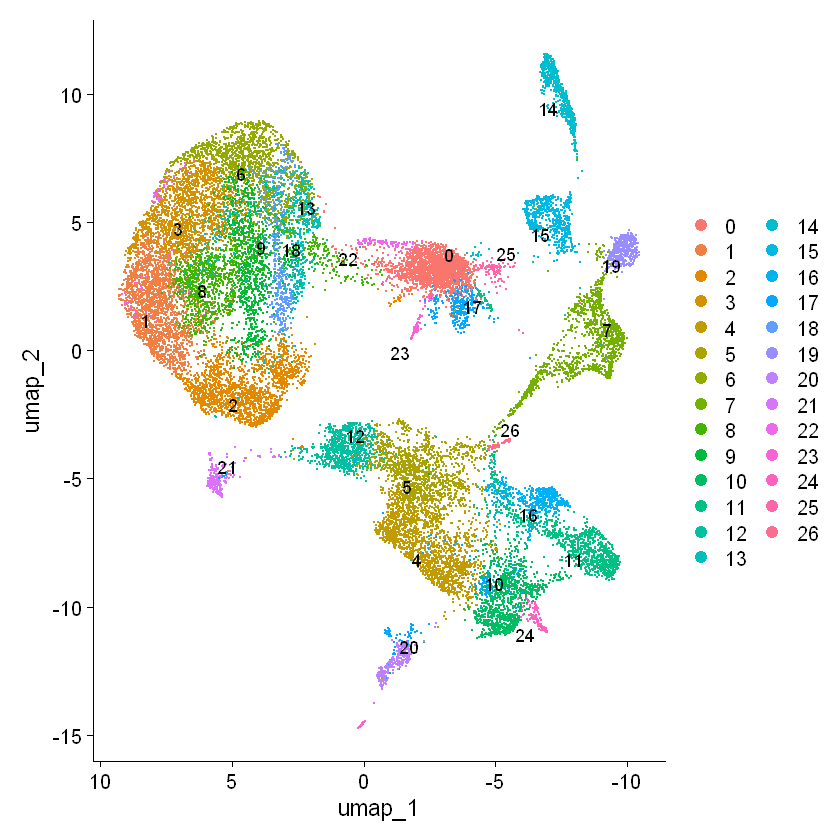

In [63]:
posttrans_plot <- UMAPPlot(postTrans) + scale_x_reverse()
LabelClusters(plot = posttrans_plot, id = "ident")

In [64]:
dim(postTrans)

[1] 36601 24606

Data with percent.mt >= 10

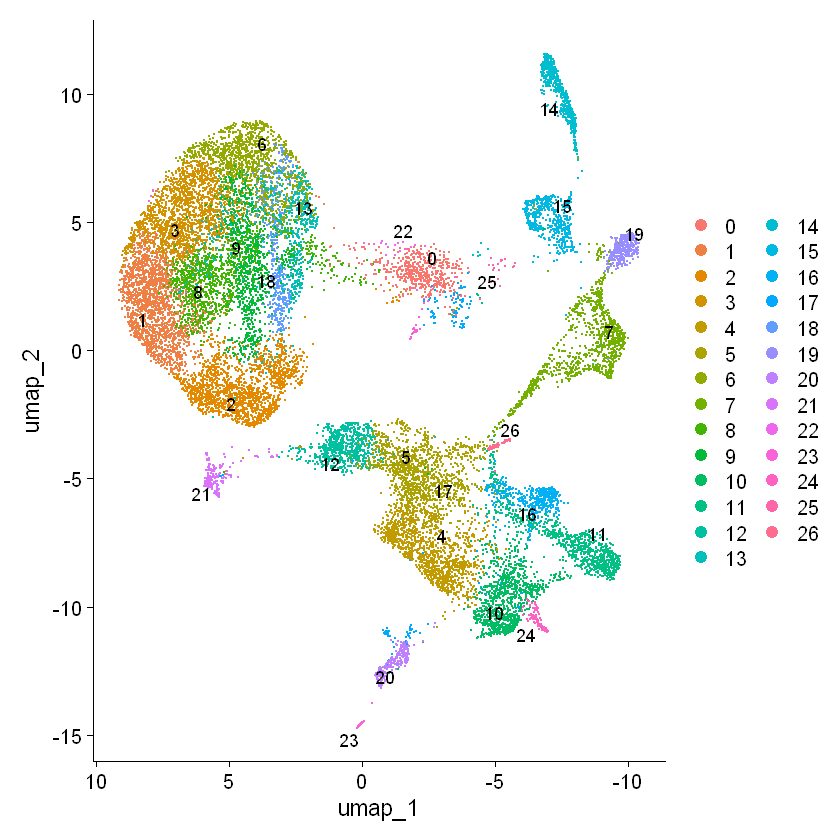

In [65]:
posttrans_rev_plot <- UMAPPlot(postTrans_rev) + scale_x_reverse()
LabelClusters(plot = posttrans_rev_plot, id = "ident")

In [66]:
dim(postTrans_rev)

[1] 36601 20229

Common Genes

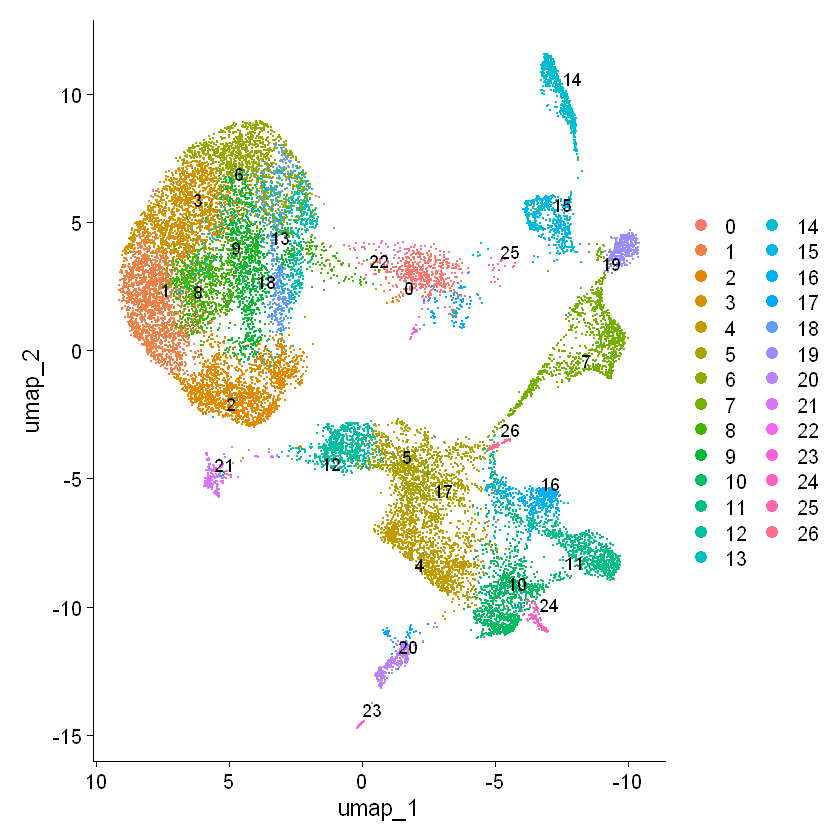

In [67]:
posttrans_common_plot <- UMAPPlot(postTrans_rev_common) + scale_x_reverse()
LabelClusters(plot = posttrans_common_plot, id = "ident")

In [68]:
dim(postTrans_rev_common)

[1]  1159 20229

### Preparing Seurat Object for Python viz

In [ ]:
# if (!requireNamespace("remotes", quietly = TRUE)) {
#   install.packages("remotes")
# }
# remotes::install_github("mojaveazure/seurat-disk")

Using GitHub PAT from the git credential store.

Skipping install of 'SeuratDisk' from a github remote, the SHA1 (877d4e18) has not changed since last install.
  Use `force = TRUE` to force installation



In [ ]:
# library(SeuratDisk)

Warning message:
"package 'SeuratDisk' was built under R version 4.4.2"
Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat



In [ ]:
# SaveH5Seurat(postTrans_rev, filename = "postTransCD34.h5Seurat", overwrite = TRUE)

Creating h5Seurat file for version 3.1.5.9900

Adding cell embeddings for pca

Adding loadings for pca

No projected loadings for pca

Adding standard deviations for pca

No JackStraw data for pca

Adding cell embeddings for umap

No loadings for umap

No projected loadings for umap

No standard deviations for umap

No JackStraw data for umap

Adding cell embeddings for integrated.harmony

No loadings for integrated.harmony

No projected loadings for integrated.harmony

No standard deviations for integrated.harmony

No JackStraw data for integrated.harmony



In [ ]:
# SaveH5Seurat(postTrans_rev_common, filename = "postTransCD34_common.h5Seurat", overwrite = TRUE)

Creating h5Seurat file for version 3.1.5.9900

Adding cell embeddings for pca

Adding loadings for pca

No projected loadings for pca

Adding standard deviations for pca

No JackStraw data for pca

Adding cell embeddings for umap

No loadings for umap

No projected loadings for umap

No standard deviations for umap

No JackStraw data for umap

Adding cell embeddings for integrated.harmony

No loadings for integrated.harmony

No projected loadings for integrated.harmony

No standard deviations for integrated.harmony

No JackStraw data for integrated.harmony

